## imports

### import packages

In [ ]:
#-*-coding:utf-8-*-

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile
import os

import warnings
warnings.filterwarnings('ignore')

from matplotlib import font_manager, rc
import matplotlib

matplotlib.rcParams['font.family'] ='Malgun Gothic'

matplotlib.rcParams['axes.unicode_minus'] =False

In [ ]:
sns.set_style('whitegrid')

### import data

#### ohlcv_data

In [ ]:
zip_file_list = ['commodity.zip', 'currency.zip', 'ohlcv_data.zip']
for zip_file in zip_file_list:
  name = zip_file.split(".")[0]
  with ZipFile(zip_file, 'r') as zip:
    zip.extractall(f'{name}/')
  print('Done')

Done
Done
Done


In [ ]:
# ohlcv 데이터 중 가장 시작 날짜가 늦은 게 무엇인지 알아보자
path = './ohlcv_data/'
ohlcv_file_list = os.listdir(path)
ohlcv_file_list = [file for file in ohlcv_file_list if file.endswith('.csv')]

In [ ]:
# 제일 늦은 것은 2016-03-03 Nikkey225
# 따라서 2016-03-03부터의 데이터를 사용하기로 한다.
# 또한 수익률을 측정해야하기 때문에 pct_change()를 사용해 수익률에 해댱하는 열을 만들어줘야한다.
for file in ohlcv_file_list:
  name = file.split('.')[0]
  df = pd.read_csv(f'ohlcv_data/{file}')
  start_date = df.Date[0]
  print(name, ": ", start_date)

KODEX골드선물(H) :  2010-10-01
KODEX200 :  2002-10-14
KINDEX일본Nikkey225(H) :  2016-03-03
KODEX인버스 :  2009-09-16
TIGER유로스탁스50(H) :  2014-04-30
KOSEF국고채10년 :  2011-10-20
TIGER원유선물(H) :  2010-08-02
TIGER차이나CSI300 :  2014-02-17
KOSEF미국달러선물인버스 :  2011-04-01
TIGER코스닥150 :  2015-11-12
TIGER미국SP500선물(H) :  2011-07-18
KOSEF단기자금 :  2010-07-29
KBSTAR중기우량회사채 :  2011-04-15
TIGER단기선진하이일드(H) :  2014-03-24
KOSEF미국달러선물 :  2011-02-24


In [ ]:
def import_ohlcv_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  df["Rate"] = df['Close'].pct_change()
  df.dropna(inplace=True)
  df['Rate'] = (np.exp(np.log(df["Rate"]+1).rolling(10).sum())-1).shift(-10)
  df.dropna(inplace=True)
  
  return df

In [ ]:
# 데이터 가져오기
KOSEF국고채10년 = import_ohlcv_data('2016-03-03', 'KOSEF국고채10년.csv')
TIGER원유선물 = import_ohlcv_data('2016-03-03', 'TIGER원유선물(H).csv')
KBSTAR중기우량회사채 = import_ohlcv_data('2016-03-03', 'KBSTAR중기우량회사채.csv')
KOSEF미국달러선물 = import_ohlcv_data('2016-03-03', 'KOSEF미국달러선물.csv')
TIGER차이나CSI300 = import_ohlcv_data('2016-03-03', 'TIGER차이나CSI300.csv')
KODEX200 = import_ohlcv_data('2016-03-03', 'KODEX200.csv')
KOSEF미국달러선물인버스 = import_ohlcv_data('2016-03-03', 'KOSEF미국달러선물인버스.csv')
KINDEX일본Nikkey225 = import_ohlcv_data('2016-03-03', 'KINDEX일본Nikkey225(H).csv')
KOSEF단기자금 = import_ohlcv_data('2016-03-03', 'KOSEF단기자금.csv')
TIGER유로스탁스50 = import_ohlcv_data('2016-03-03', 'TIGER유로스탁스50(H).csv')
KODEX골드선물 = import_ohlcv_data('2016-03-03', 'KODEX골드선물(H).csv')
TIGER미국SP500선물 = import_ohlcv_data('2016-03-03', 'TIGER미국SP500선물(H).csv')
TIGER코스닥150 = import_ohlcv_data('2016-03-03', 'TIGER코스닥150.csv')
TIGER단기선진하이일드 = import_ohlcv_data('2016-03-03', 'TIGER단기선진하이일드(H).csv')
KODEX인버스 = import_ohlcv_data('2016-03-03', 'KODEX인버스.csv')

In [ ]:
etf_list = [TIGER단기선진하이일드, TIGER코스닥150, TIGER유로스탁스50, KODEX인버스,
            KODEX골드선물, KODEX200, KOSEF단기자금, KOSEF미국달러선물, TIGER원유선물,
            TIGER미국SP500선물, KOSEF국고채10년, KBSTAR중기우량회사채, TIGER차이나CSI300,
            KOSEF미국달러선물인버스, KINDEX일본Nikkey225]
name_list = []
for file in ohlcv_file_list:
  name_list.append(file.split('.')[0])

close_dict = {}
for i in range(len(etf_list)):
  name = name_list[i] +'_Close'
  close_dict[name] = etf_list[i].Close

close_price = pd.DataFrame(close_dict)
close_price['Date'] = KODEX200.Date
close_price

,KODEX골드선물(H)_Close,KODEX200_Close,KINDEX일본Nikkey225(H)_Close,KODEX인버스_Close,TIGER유로스탁스50(H)_Close,KOSEF국고채10년_Close,TIGER원유선물(H)_Close,TIGER차이나CSI300_Close,KOSEF미국달러선물인버스_Close,TIGER코스닥150_Close,TIGER미국SP500선물(H)_Close,KOSEF단기자금_Close,KBSTAR중기우량회사채_Close,TIGER단기선진하이일드(H)_Close,KOSEF미국달러선물_Close,Date
1,9530,10413,9645,8250,9745,21245,93723,11972,3600,23275,110863,94041,6848,10410,10540,2016-03-04
2,9565,10360,9640,8230,9725,21288,93728,11928,3765,23290,110867,94201,6880,10430,10515,2016-03-07
3,9570,10368,9635,8295,9790,21137,93718,11981,3800,23265,111188,94201,6819,10385,10465,2016-03-08
4,9565,10432,9580,8260,9685,21232,93741,12098,3745,23215,111132,94069,6796,10300,10360,2016-03-09
5,9555,10489,9590,8200,9640,21424,93728,11967,3810,23255,111026,94243,6810,10415,10480,2016-03-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,11565,11360,12245,4890,12330,31685,101330,13495,5555,45920,107495,101225,11225,9280,17695,2022-06-27
1554,11580,11205,12270,4855,12275,31930,101330,13455,5740,45985,108000,101315,11335,9300,17815,2022-06-28
1555,11540,10940,12185,4940,12220,31395,101330,13635,5765,44885,107930,101240,11295,9185,17625,2022-06-29
1556,11460,10715,11930,5025,12185,30875,101330,13630,5675,44335,108030,101320,11495,9185,17445,2022-06-30


In [ ]:
etf_list = [TIGER단기선진하이일드, TIGER코스닥150, TIGER유로스탁스50, KODEX인버스,
            KODEX골드선물, KODEX200, KOSEF단기자금, KOSEF미국달러선물, TIGER원유선물,
            TIGER미국SP500선물, KOSEF국고채10년, KBSTAR중기우량회사채, TIGER차이나CSI300,
            KOSEF미국달러선물인버스, KINDEX일본Nikkey225]
name_list = []
for file in ohlcv_file_list:
  name_list.append(file.split('.')[0])

volume_dict = {}
for i in range(len(etf_list)):
  name = name_list[i] +'_Volume'
  volume_dict[name] = etf_list[i].Volume

volume = pd.DataFrame(volume_dict)
volume['Date'] = KODEX200.Date
volume

,KODEX골드선물(H)_Volume,KODEX200_Volume,KINDEX일본Nikkey225(H)_Volume,KODEX인버스_Volume,TIGER유로스탁스50(H)_Volume,KOSEF국고채10년_Volume,TIGER원유선물(H)_Volume,TIGER차이나CSI300_Volume,KOSEF미국달러선물인버스_Volume,TIGER코스닥150_Volume,TIGER미국SP500선물(H)_Volume,KOSEF단기자금_Volume,KBSTAR중기우량회사채_Volume,TIGER단기선진하이일드(H)_Volume,KOSEF미국달러선물_Volume,Date
1,201,429737,3274,16488203,142158,7658963,402337,28062,2126369,20731,90,3,512798,11432,25,2016-03-04
2,384,422480,10172,9586362,67391,6940749,247118,56605,3942217,26105,98,82,490423,114302,308662,2016-03-07
3,2,421993,7420,16426298,126211,6926830,200878,25354,3438044,4126,14,0,507145,3178,336969,2016-03-08
4,2,436810,4272,12569213,47065,6053743,719311,10249,1870277,27461,779,104,484589,704,316169,2016-03-09
5,1,423083,5708,22581765,34029,9241212,165302,14659,1862786,10555,762,55,491465,1165,310932,2016-03-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1769,392499,57299,39915300,153877,8572714,13102,6523,201992,42587,11849,74,77249,3433,839,2022-06-27
1554,36,137653,8874,41174970,211072,6746503,626,3408,149858,13006,59939,32,69705,1422,96,2022-06-28
1555,32,108203,1973,34154672,272401,6177527,3472,2652,65386,30109,6975,824,37376,1392,2106,2022-06-29
1556,2668,159717,1445,36077871,53241,7940411,323,6501,177411,24573,13436,37,116817,3468,48,2022-06-30


#### famma_french_daily_factor는 4/29 이후로 업데이트가 중단되어 사용하기가 어려울 것으로 보인다...

#### currency 

In [ ]:
Currency = pd.read_csv('currency/currency.csv')
Currency = Currency[Currency.Date >= '2016-03-04'].reset_index(drop=True) # 시작하는 날짜보다 뒤에 있는 것만 가져오기

In [ ]:
currency_list = ['USD', 'JPY', 'CNY', 'EUR']  # 환율 마다 스케일이 다르기 때문에 환율의 변화율로 보는 것이 더 적합하다.
for currency in currency_list:                # 따라서 환율의 변화율을 변수로 설정해주도록 한다.
  col = currency + ' Change'
  Currency[col] = Currency[currency].pct_change()

Currency.drop(currency_list, axis=1, inplace=True)
Currency.fillna(0, inplace=True)

In [ ]:
Currency.head()

,Date,USD Change,JPY Change,CNY Change,EUR Change
0,2016-03-04,0.000000,0.000000,0.000000,0.000000
1,2016-03-07,0.001160,0.003778,-0.000217,0.002078
2,2016-03-08,0.008626,0.015867,0.010156,0.007431
3,2016-03-09,-0.000322,-0.007512,-0.001828,-0.000548
4,2016-03-10,-0.003645,-0.000544,-0.001885,0.013024


#### Commodity

In [ ]:
path = './commodity/'
commodity_file_list = os.listdir(path)
commodity_file_list = [file for file in commodity_file_list if file.endswith('.csv')]

In [ ]:
def import_commodity_data(start, file):
  file_path = f'commodity/{file}'  # 파일 불러오기
  name = file.split('.')[0]
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  df = df.iloc[:,:2]                                # Date를 뺀 가장 첫번째 열이 모두 가격을 나타내므로 이것만을 사용하기로 한다
  df.columns = ['Date', f'{name} Price']                    # 열 이름을 똑같이 변경
  return df

In [ ]:
gold = import_commodity_data('2016-03-04', 'gold.csv')
silver = import_commodity_data('2016-03-04', 'silver.csv')
natural_gas = import_commodity_data('2016-03-04', 'natural_gas.csv')
oil = import_commodity_data('2016-03-04', 'oil.csv')

In [ ]:
gold

,Date,gold Price
0,2016-03-04,1279.900024
1,2016-03-07,1272.300049
2,2016-03-08,1276.300049
3,2016-03-09,1260.000000
4,2016-03-10,1273.000000
...,...,...
1596,2022-07-11,1736.699951
1597,2022-07-12,1735.500000
1598,2022-07-13,1734.199951
1599,2022-07-14,1710.500000


## Make Model

### preparation

In [ ]:
print(ohlcv_file_list)
print(commodity_file_list)
print(['Currency'])

['KODEX골드선물(H).csv', 'KODEX200.csv', 'KINDEX일본Nikkey225(H).csv', 'KODEX인버스.csv', 'TIGER유로스탁스50(H).csv', 'KOSEF국고채10년.csv', 'TIGER원유선물(H).csv', 'TIGER차이나CSI300.csv', 'KOSEF미국달러선물인버스.csv', 'TIGER코스닥150.csv', 'TIGER미국SP500선물(H).csv', 'KOSEF단기자금.csv', 'KBSTAR중기우량회사채.csv', 'TIGER단기선진하이일드(H).csv', 'KOSEF미국달러선물.csv']
['natural_gas.csv', 'silver.csv', 'gold.csv', 'oil.csv']
['Currency']


In [ ]:
ohlcv_list = [KOSEF국고채10년, 
 TIGER원유선물,
 KBSTAR중기우량회사채,
 KOSEF미국달러선물,
 TIGER차이나CSI300,
 KODEX200,
 KOSEF미국달러선물인버스,
 KINDEX일본Nikkey225,
 KOSEF단기자금,
 TIGER유로스탁스50,
 KODEX골드선물,
 TIGER미국SP500선물,
 TIGER코스닥150,
 TIGER단기선진하이일드,
 KODEX인버스]
commodity_list = [gold, natural_gas, oil, silver]
economy_list = [Currency]
total_feature_list = commodity_list  +economy_list+ [close_price]+[volume]

In [ ]:
def merge_data_set(dataset, feature_list):
  df = dataset
  for feature in feature_list:
    df = pd.merge(df, feature, how='left')
  df[['USD Change', 'JPY Change', 'CNY Change', 'EUR Change']] = df[['USD Change', 'JPY Change', 'CNY Change', 'EUR Change']].fillna(0)
  df = df.fillna(method='ffill')
  return df

### KODEX200

In [ ]:
feature_list = total_feature_list
KODEX200_combined = merge_data_set(KODEX200, feature_list)
KODEX200_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,KOSEF국고채10년_Volume,TIGER원유선물(H)_Volume,TIGER차이나CSI300_Volume,KOSEF미국달러선물인버스_Volume,TIGER코스닥150_Volume,TIGER미국SP500선물(H)_Volume,KOSEF단기자금_Volume,KBSTAR중기우량회사채_Volume,TIGER단기선진하이일드(H)_Volume,KOSEF미국달러선물_Volume
1552,2022-06-27,31520,31930,31235,31685,8572714,-0.023039,1830.699951,6.538,110.540001,...,8572714,13102,6523,201992,42587,11849,74,77249,3433,839
1553,2022-06-28,31725,31930,31560,31930,6746503,-0.039775,1826.000000,6.765,112.220001,...,6746503,626,3408,149858,13006,59939,32,69705,1422,96
1554,2022-06-29,31555,31655,31365,31395,6177527,-0.018315,1830.300049,6.833,114.050003,...,6177527,3472,2652,65386,30109,6975,824,37376,1392,2106
1555,2022-06-30,31280,31280,30870,30875,7940411,-0.005344,1817.300049,6.602,110.449997,...,7940411,323,6501,177411,24573,13436,37,116817,3468,48
1556,2022-07-01,31050,31175,30335,30560,6240988,0.010962,1806.099976,5.950,109.339996,...,6240988,1612,4451,296644,178521,28145,53,69527,1205,699


In [ ]:
KODEX200_combined.drop(['Date', 'KODEX200_Close','KODEX200_Volume'], axis=1, inplace=True)

In [ ]:
X = KODEX200_combined.drop('Rate', axis=1)
y = KODEX200_combined[['Rate']]

In [ ]:
X = X.clip(lower=X.quantile(0.05),upper=X.quantile(0.95), axis=1)
y = y.clip(lower=y.quantile(0.05),upper=y.quantile(0.95), axis=1)

In [ ]:
print(f'윈저화된 값: 최소({float(y.min())}), 최대({float(y.max())})')

윈저화된 값: 최소(-0.05031574330083619), 최대(0.05565090547404276)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.86914591e-01, 7.95821952e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.67818986e-01, 1.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.82090123e-01, 2.20678410e-01, 1.00000000e+00],
       ...,
       [4.86489461e-01, 4.82561959e-01, 4.89179500e-01, ...,
        0.00000000e+00, 9.62288868e-02, 6.73454693e-03],
       [4.72733821e-01, 4.63899672e-01, 4.64185812e-01, ...,
        4.89706039e-02, 2.40885780e-01, 2.34789550e-05],
       [4.61229104e-01, 4.58674231e-01, 4.37172431e-01, ...,
        8.61166973e-03, 8.31986175e-02, 2.14636781e-03]])

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

In [ ]:
def make_windowed_dataset(dataset,time_step):
  windowed_dataset = []
  for i in range(0,len(dataset)-time_step+1) :
    windowed_dataset.append(dataset[i:i+time_step])
  return np.array(windowed_dataset)

In [ ]:
X_scaled.shape

(1557, 41)

In [ ]:
num = 10
X_scaled = make_windowed_dataset(X_scaled, num)
X_scaled.shape

(1548, 10, 41)

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

(1548, 41)

In [ ]:
# 끝에 10개의 데이터는 사용하지 못함
y = y.iloc[:-(num-1)].reset_index(drop=True)
y.shape

(1548, 1)

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.02096861945378614
MAE: 0.01673692545800842
R2: -1.3903997756634974


No handles with labels found to put in legend.


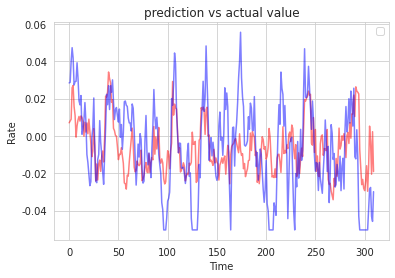

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 다음 주 예측

* 이전 6 영업일 만큼의 데이터가 필요하다. 

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  #df["Rate"] = df['Close'].pct_change()
  #df.dropna(inplace=True)
  #df['Rate'] = (np.exp(np.log(df["Rate"]+1).rolling(5).sum())-1).shift(-5)
  #df.dropna(inplace=True)
  
  return df


KODEX200_predict = predict_data('2016-03-04', 'KODEX200.csv')
#KODEX200_predict.tail()
KODEX200_combined_predict = merge_data_set(KODEX200_predict, feature_list)
test=KODEX200_combined_predict.iloc[-num:]
test.drop(['Date', 'KODEX200_Close','KODEX200_Volume'],axis=1,inplace=True)

test=scaler.transform(test)
test.shape

(10, 41)

In [ ]:
test=test.reshape(1,num,41)
test=test.mean(axis=1)
#print(test.shape)

pred_kodex200=lgbm.predict(test)
pred_kodex200=pd.DataFrame({'prediction':pred_kodex200})
pred_kodex200.index = ["KODEX200"]
pred_kodex200.to_csv('Pred.csv', encoding='utf-8-sig')

### KODEX인버스

In [ ]:
feature_list = total_feature_list
KODEX인버스_combined = merge_data_set(KODEX인버스, feature_list)
KODEX인버스_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,KOSEF국고채10년_Volume,TIGER원유선물(H)_Volume,TIGER차이나CSI300_Volume,KOSEF미국달러선물인버스_Volume,TIGER코스닥150_Volume,TIGER미국SP500선물(H)_Volume,KOSEF단기자금_Volume,KBSTAR중기우량회사채_Volume,TIGER단기선진하이일드(H)_Volume,KOSEF미국달러선물_Volume
1552,2022-06-27,4920,4965,4850,4890,39915300,0.023517,1830.699951,6.538,110.540001,...,8572714,13102,6523,201992,42587,11849,74,77249,3433,839
1553,2022-06-28,4890,4915,4855,4855,41174970,0.040165,1826.000000,6.765,112.220001,...,6746503,626,3408,149858,13006,59939,32,69705,1422,96
1554,2022-06-29,4910,4945,4895,4940,34154672,0.016194,1830.300049,6.833,114.050003,...,6177527,3472,2652,65386,30109,6975,824,37376,1392,2106
1555,2022-06-30,4965,5025,4955,5025,36077871,0.001990,1817.300049,6.602,110.449997,...,7940411,323,6501,177411,24573,13436,37,116817,3468,48
1556,2022-07-01,5000,5110,4965,5070,36399559,-0.011834,1806.099976,5.950,109.339996,...,6240988,1612,4451,296644,178521,28145,53,69527,1205,699


In [ ]:
KODEX인버스_combined.drop(['Date', 'KODEX인버스_Close','KODEX인버스_Volume'], axis=1, inplace=True)

In [ ]:
X = KODEX인버스_combined.drop('Rate', axis=1)
y = KODEX인버스_combined[['Rate']]

In [ ]:
X = X.clip(lower=X.quantile(0.05),upper=X.quantile(0.95), axis=1)
y = y.clip(lower=y.quantile(0.05),upper=y.quantile(0.95), axis=1)

In [ ]:
print(f'윈저화된 값: 최소({float(y.min())}), 최대({float(y.max())})')

윈저화된 값: 최소(-0.0557602046804216), 최대(0.052796140176164345)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        3.86914591e-01, 7.95821952e-01, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        3.67818986e-01, 1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        3.82090123e-01, 2.20678410e-01, 1.00000000e+00],
       ...,
       [2.57413998e-01, 2.58079848e-01, 2.59391346e-01, ...,
        0.00000000e+00, 9.62288868e-02, 6.73454693e-03],
       [2.70462633e-01, 2.77091255e-01, 2.73656681e-01, ...,
        4.89706039e-02, 2.40885780e-01, 2.34789550e-05],
       [2.78766311e-01, 2.97290875e-01, 2.76034237e-01, ...,
        8.61166973e-03, 8.31986175e-02, 2.14636781e-03]])

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

In [ ]:
X_scaled.shape

(1557, 41)

In [ ]:
num = 10
X_scaled = make_windowed_dataset(X_scaled, num)
X_scaled.shape

(1548, 10, 41)

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

(1548, 41)

In [ ]:
# 끝에 10개의 데이터는 사용하지 못함
y = y.iloc[:-(num-1)].reset_index(drop=True)
y.shape

(1548, 1)

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.022828207477837377
MAE: 0.017710798910078072
R2: -2.892659796150416


No handles with labels found to put in legend.


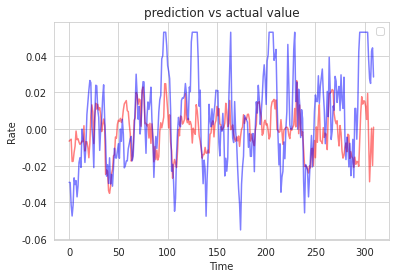

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 다음 주 예측

* 이전 10 영업일 만큼의 데이터가 필요하다. 

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  return df

KODEX인버스_predict = predict_data('2016-03-04', 'KODEX인버스.csv')
KODEX인버스_combined_predict = merge_data_set(KODEX인버스_predict, feature_list)
test=KODEX인버스_combined_predict.iloc[-num:]
test.drop(['Date', 'KODEX인버스_Close','KODEX인버스_Volume'],axis=1,inplace=True)

test=scaler.transform(test)
test.shape

(10, 41)

In [ ]:
test=test.reshape(1,num,41)
test=test.mean(axis=1)
pred_KODEX인버스 = lgbm.predict(test)
pred_KODEX인버스=pd.DataFrame({"prediction":pred_KODEX인버스})
pred_KODEX인버스.index = ['KODEX인버스']

pred_KODEX인버스.to_csv('Pred.csv', encoding='utf-8-sig', mode='a', header=False)

### TIGER코스닥150

In [ ]:
feature_list = total_feature_list
TIGER코스닥150_combined = merge_data_set(TIGER코스닥150, feature_list)
TIGER코스닥150_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,KOSEF국고채10년_Volume,TIGER원유선물(H)_Volume,TIGER차이나CSI300_Volume,KOSEF미국달러선물인버스_Volume,TIGER코스닥150_Volume,TIGER미국SP500선물(H)_Volume,KOSEF단기자금_Volume,KBSTAR중기우량회사채_Volume,TIGER단기선진하이일드(H)_Volume,KOSEF미국달러선물_Volume
1552,2022-06-27,11235,11420,11115,11360,392499,-0.022007,1830.699951,6.538,110.540001,...,8572714,13102,6523,201992,42587,11849,74,77249,3433,839
1553,2022-06-28,11400,11440,11125,11205,137653,-0.030790,1826.000000,6.765,112.220001,...,6746503,626,3408,149858,13006,59939,32,69705,1422,96
1554,2022-06-29,11200,11200,10865,10940,108203,0.021481,1830.300049,6.833,114.050003,...,6177527,3472,2652,65386,30109,6975,824,37376,1392,2106
1555,2022-06-30,10925,10970,10715,10715,159717,0.041064,1817.300049,6.602,110.449997,...,7940411,323,6501,177411,24573,13436,37,116817,3468,48
1556,2022-07-01,10850,10920,10440,10500,125546,0.060476,1806.099976,5.950,109.339996,...,6240988,1612,4451,296644,178521,28145,53,69527,1205,699


In [ ]:
TIGER코스닥150_combined.drop(['Date', 'TIGER코스닥150_Close','TIGER코스닥150_Volume'], axis=1, inplace=True)

In [ ]:
X = TIGER코스닥150_combined.drop('Rate', axis=1)
y = TIGER코스닥150_combined[['Rate']]

In [ ]:
X = X.clip(lower=X.quantile(0.05),upper=X.quantile(0.95), axis=1)
y = y.clip(lower=y.quantile(0.05),upper=y.quantile(0.95), axis=1)

In [ ]:
print(f'윈저화된 값: 최소({float(y.min())}), 최대({float(y.max())})')

윈저화된 값: 최소(-0.08080362120051791), 최대(0.07575832546477405)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[2.49992193e-01, 2.43381357e-01, 2.53563510e-01, ...,
        3.86914591e-01, 7.95821952e-01, 0.00000000e+00],
       [2.57487274e-01, 2.47537249e-01, 2.52771619e-01, ...,
        3.67818986e-01, 1.00000000e+00, 1.00000000e+00],
       [2.47181537e-01, 2.35839182e-01, 2.32182452e-01, ...,
        3.82090123e-01, 2.20678410e-01, 1.00000000e+00],
       ...,
       [3.71474970e-01, 3.57745352e-01, 3.34178017e-01, ...,
        0.00000000e+00, 9.62288868e-02, 6.73454693e-03],
       [3.28534399e-01, 3.22343307e-01, 3.10421286e-01, ...,
        4.89706039e-02, 2.40885780e-01, 2.34789550e-05],
       [3.16823335e-01, 3.14647211e-01, 2.66867279e-01, ...,
        8.61166973e-03, 8.31986175e-02, 2.14636781e-03]])

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

In [ ]:
X_scaled.shape

(1557, 41)

In [ ]:
num = 10
X_scaled = make_windowed_dataset(X_scaled, num)
X_scaled.shape

(1548, 10, 41)

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

(1548, 41)

In [ ]:
# 끝에 10개의 데이터는 사용하지 못함
y = y.iloc[:-(num-1)].reset_index(drop=True)
y.shape

(1548, 1)

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.037899129182153345
MAE: 0.030666940504678716
R2: -2.5395899693693234


No handles with labels found to put in legend.


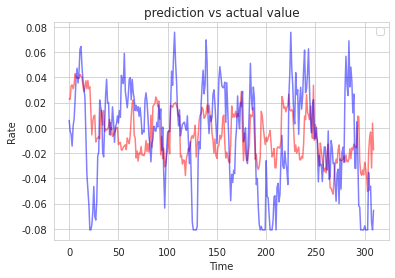

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 다음 주 예측

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  return df

TIGER코스닥150_predict = predict_data('2016-03-04', 'TIGER코스닥150.csv')
TIGER코스닥150_combined_predict = merge_data_set(TIGER코스닥150_predict, feature_list)
test=TIGER코스닥150_combined_predict.iloc[-num:]
test.drop(['Date', 'TIGER코스닥150_Close','TIGER코스닥150_Volume'],axis=1,inplace=True)

test=scaler.transform(test)
test.shape

(10, 41)

In [ ]:
test=test.reshape(1,num,41)
test=test.mean(axis=1)
pred_TIGER코스닥150 = lgbm.predict(test)
pred_TIGER코스닥150=pd.DataFrame({"prediction":pred_TIGER코스닥150})
pred_TIGER코스닥150.index = ['TIGER코스닥150']

pred_TIGER코스닥150.to_csv('Pred.csv', encoding='utf-8-sig', mode='a', header=False)

### KINDEX일본Nikkey225

In [ ]:
feature_list = total_feature_list
KINDEX일본Nikkey225_combined = merge_data_set(KINDEX일본Nikkey225, feature_list)
KINDEX일본Nikkey225_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,KOSEF국고채10년_Volume,TIGER원유선물(H)_Volume,TIGER차이나CSI300_Volume,KOSEF미국달러선물인버스_Volume,TIGER코스닥150_Volume,TIGER미국SP500선물(H)_Volume,KOSEF단기자금_Volume,KBSTAR중기우량회사채_Volume,TIGER단기선진하이일드(H)_Volume,KOSEF미국달러선물_Volume
1552,2022-06-27,17620,17695,17610,17695,839,0.000848,1830.699951,6.538,110.540001,...,8572714,13102,6523,201992,42587,11849,74,77249,3433,839
1553,2022-06-28,17665,17815,17665,17815,96,-0.026663,1826.000000,6.765,112.220001,...,6746503,626,3408,149858,13006,59939,32,69705,1422,96
1554,2022-06-29,17660,17665,17495,17625,2106,-0.009362,1830.300049,6.833,114.050003,...,6177527,3472,2652,65386,30109,6975,824,37376,1392,2106
1555,2022-06-30,17610,17610,17385,17445,48,0.005732,1817.300049,6.602,110.449997,...,7940411,323,6501,177411,24573,13436,37,116817,3468,48
1556,2022-07-01,17295,17390,17020,17105,699,0.031862,1806.099976,5.950,109.339996,...,6240988,1612,4451,296644,178521,28145,53,69527,1205,699


In [ ]:
KINDEX일본Nikkey225_combined.drop(['Date', 'KINDEX일본Nikkey225(H)_Close','KINDEX일본Nikkey225(H)_Volume'], axis=1, inplace=True)

In [ ]:
X = KINDEX일본Nikkey225_combined.drop('Rate', axis=1)
y = KINDEX일본Nikkey225_combined[['Rate']]

In [ ]:
X = X.clip(lower=X.quantile(0.05),upper=X.quantile(0.95), axis=1)
y = y.clip(lower=y.quantile(0.05),upper=y.quantile(0.95), axis=1)

In [ ]:
print(f'윈저화된 값: 최소({float(y.min())}), 최대({float(y.max())})')

윈저화된 값: 최소(-0.05767480174822132), 최대(0.06212137013758962)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler =MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[2.39981888e-02, 1.64562669e-02, 3.10786106e-02, ...,
        3.86914591e-01, 7.95821952e-01, 0.00000000e+00],
       [2.45641838e-02, 1.58926961e-02, 2.25091408e-02, ...,
        3.67818986e-01, 1.00000000e+00, 1.00000000e+00],
       [2.23002038e-02, 1.36384130e-02, 6.51279707e-03, ...,
        3.82090123e-01, 2.20678410e-01, 1.00000000e+00],
       ...,
       [8.29975096e-01, 8.18417493e-01, 8.25754113e-01, ...,
        0.00000000e+00, 9.62288868e-02, 6.73454693e-03],
       [8.24315146e-01, 8.12218215e-01, 8.13185558e-01, ...,
        4.89706039e-02, 2.40885780e-01, 2.34789550e-05],
       [7.88657460e-01, 7.87421100e-01, 7.71480804e-01, ...,
        8.61166973e-03, 8.31986175e-02, 2.14636781e-03]])

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

In [ ]:
num = 8
X_scaled = make_windowed_dataset(X_scaled, num)
X_scaled.shape

(1550, 8, 41)

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

(1550, 41)

In [ ]:
# 끝에 10개의 데이터는 사용하지 못함
y = y.iloc[:-(num-1)].reset_index(drop=True)
y.shape

(1550, 1)

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.029106187647602207
MAE: 0.023294670665407167
R2: -2.105813650747703


No handles with labels found to put in legend.


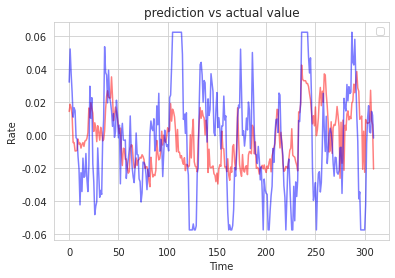

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 다음 주 예측

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  return df

KINDEX일본Nikkey225_predict = predict_data('2016-03-04', 'KINDEX일본Nikkey225(H).csv')
KINDEX일본Nikkey225_combined_predict = merge_data_set(KINDEX일본Nikkey225_predict, feature_list)
test=KINDEX일본Nikkey225_combined_predict.iloc[-num:]
test.drop(['Date', 'KINDEX일본Nikkey225(H)_Close','KINDEX일본Nikkey225(H)_Volume'],axis=1,inplace=True)

test=scaler.transform(test)
test.shape

(8, 41)

In [ ]:
test=test.reshape(1,num,41)
test=test.mean(axis=1)
pred_KINDEX일본Nikkey225 = lgbm.predict(test)
pred_KINDEX일본Nikkey225=pd.DataFrame({"prediction":pred_KINDEX일본Nikkey225})
pred_KINDEX일본Nikkey225.index = ['KINDEX일본Nikkey225']

pred_KINDEX일본Nikkey225.to_csv('Pred.csv', encoding='utf-8-sig', mode='a', header=False)

### TIGER차이나CSI300

In [ ]:
feature_list = total_feature_list
TIGER차이나CSI300_combined = merge_data_set(TIGER차이나CSI300, feature_list)
TIGER차이나CSI300_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,KOSEF국고채10년_Volume,TIGER원유선물(H)_Volume,TIGER차이나CSI300_Volume,KOSEF미국달러선물인버스_Volume,TIGER코스닥150_Volume,TIGER미국SP500선물(H)_Volume,KOSEF단기자금_Volume,KBSTAR중기우량회사채_Volume,TIGER단기선진하이일드(H)_Volume,KOSEF미국달러선물_Volume
1552,2022-06-27,11255,11285,11155,11225,77249,-0.015145,1830.699951,6.538,110.540001,...,8572714,13102,6523,201992,42587,11849,74,77249,3433,839
1553,2022-06-28,11240,11340,11120,11335,69705,-0.019409,1826.000000,6.765,112.220001,...,6746503,626,3408,149858,13006,59939,32,69705,1422,96
1554,2022-06-29,11315,11370,11250,11295,37376,-0.023019,1830.300049,6.833,114.050003,...,6177527,3472,2652,65386,30109,6975,824,37376,1392,2106
1555,2022-06-30,11295,11535,11155,11495,116817,-0.036973,1817.300049,6.602,110.449997,...,7940411,323,6501,177411,24573,13436,37,116817,3468,48
1556,2022-07-01,11550,11550,11335,11470,69527,-0.034874,1806.099976,5.950,109.339996,...,6240988,1612,4451,296644,178521,28145,53,69527,1205,699


In [ ]:
TIGER차이나CSI300_combined.drop(['Date', 'TIGER차이나CSI300_Close','TIGER차이나CSI300_Volume'], axis=1, inplace=True)

In [ ]:
X = TIGER차이나CSI300_combined.drop('Rate', axis=1)
y = TIGER차이나CSI300_combined[['Rate']]

In [ ]:
X = X.clip(lower=X.quantile(0.05),upper=X.quantile(0.95), axis=1)
y = y.clip(lower=y.quantile(0.05),upper=y.quantile(0.95), axis=1)

In [ ]:
print(f'윈저화된 값: 최소({float(y.min())}), 최대({float(y.max())})')

윈저화된 값: 최소(-0.05364617342305036), 최대(0.06057029198457961)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[3.60478147e-02, 2.55216095e-02, 2.94957541e-02, ...,
        3.86914591e-01, 7.95821952e-01, 0.00000000e+00],
       [4.51998506e-02, 3.87481371e-02, 4.37739536e-02, ...,
        3.67818986e-01, 1.00000000e+00, 1.00000000e+00],
       [4.70676130e-02, 3.65126677e-02, 8.26632599e-03, ...,
        3.82090123e-01, 2.20678410e-01, 1.00000000e+00],
       ...,
       [8.70937617e-01, 8.68479881e-01, 8.74727587e-01, ...,
        0.00000000e+00, 9.62288868e-02, 6.73454693e-03],
       [8.67202092e-01, 8.99217586e-01, 8.56879838e-01, ...,
        4.89706039e-02, 2.40885780e-01, 2.34789550e-05],
       [9.14830034e-01, 9.02011923e-01, 8.90696626e-01, ...,
        8.61166973e-03, 8.31986175e-02, 2.14636781e-03]])

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

In [ ]:
num = 9
X_scaled = make_windowed_dataset(X_scaled, num)
X_scaled.shape

(1549, 9, 41)

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

(1549, 41)

In [ ]:
y = y.iloc[:-(num-1)].reset_index(drop=True)
y.shape

(1549, 1)

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.042168834922254636
MAE: 0.03408020143427323
R2: -13.673614941751762


No handles with labels found to put in legend.


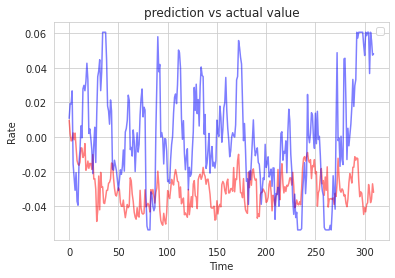

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 다음 주 예측

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  return df

TIGER차이나CSI300_predict = predict_data('2016-03-04', 'TIGER차이나CSI300.csv')
TIGER차이나CSI300_combined_predict = merge_data_set(TIGER차이나CSI300_predict, feature_list)
test=TIGER차이나CSI300_combined_predict.iloc[-num:]
test.drop(['Date', 'TIGER차이나CSI300_Close','TIGER차이나CSI300_Volume'],axis=1,inplace=True)

test=scaler.transform(test)
test.shape

(9, 41)

In [ ]:
test=test.reshape(1,num,41)
test=test.mean(axis=1)
pred_TIGER차이나CSI300 = lgbm.predict(test)
pred_TIGER차이나CSI300=pd.DataFrame({"prediction":pred_TIGER차이나CSI300})
pred_TIGER차이나CSI300.index = ['TIGER차이나CSI300']

pred_TIGER차이나CSI300.to_csv('Pred.csv', encoding='utf-8-sig', mode='a', header=False)

### TIGER유로스탁스50

In [ ]:
feature_list = total_feature_list
TIGER유로스탁스50_combined = merge_data_set(TIGER유로스탁스50, feature_list)
TIGER유로스탁스50_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,KOSEF국고채10년_Volume,TIGER원유선물(H)_Volume,TIGER차이나CSI300_Volume,KOSEF미국달러선물인버스_Volume,TIGER코스닥150_Volume,TIGER미국SP500선물(H)_Volume,KOSEF단기자금_Volume,KBSTAR중기우량회사채_Volume,TIGER단기선진하이일드(H)_Volume,KOSEF미국달러선물_Volume
1552,2022-06-27,12220,12335,12180,12245,57299,-0.027358,1830.699951,6.538,110.540001,...,8572714,13102,6523,201992,42587,11849,74,77249,3433,839
1553,2022-06-28,12265,12270,12130,12270,8874,-0.035860,1826.000000,6.765,112.220001,...,6746503,626,3408,149858,13006,59939,32,69705,1422,96
1554,2022-06-29,12180,12200,12080,12185,1973,-0.022979,1830.300049,6.833,114.050003,...,6177527,3472,2652,65386,30109,6975,824,37376,1392,2106
1555,2022-06-30,12145,12145,11905,11930,1445,-0.007963,1817.300049,6.602,110.449997,...,7940411,323,6501,177411,24573,13436,37,116817,3468,48
1556,2022-07-01,11930,12015,11760,11850,17678,-0.005485,1806.099976,5.950,109.339996,...,6240988,1612,4451,296644,178521,28145,53,69527,1205,699


In [ ]:
TIGER유로스탁스50_combined.drop(['Date', 'TIGER유로스탁스50(H)_Close','TIGER유로스탁스50(H)_Volume'], axis=1, inplace=True)

In [ ]:
X = TIGER유로스탁스50_combined.drop('Rate', axis=1)
y = TIGER유로스탁스50_combined[['Rate']]

In [ ]:
X = X.clip(lower=X.quantile(0.05),upper=X.quantile(0.95), axis=1)
y = y.clip(lower=y.quantile(0.05),upper=y.quantile(0.95), axis=1)

In [ ]:
print(f'윈저화된 값: 최소({float(y.min())}), 최대({float(y.max())})')

윈저화된 값: 최소(-0.050393636300437694), 최대(0.04902578627981629)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[1.08084738e-02, 9.67741935e-03, 2.62131716e-02, ...,
        3.86914591e-01, 7.95821952e-01, 0.00000000e+00],
       [1.72935581e-02, 8.60215054e-03, 2.51299827e-02, ...,
        3.67818986e-01, 1.00000000e+00, 1.00000000e+00],
       [1.18893212e-02, 6.45161290e-03, 1.10485269e-02, ...,
        3.82090123e-01, 2.20678410e-01, 1.00000000e+00],
       ...,
       [5.56636403e-01, 5.48387097e-01, 5.53726170e-01, ...,
        0.00000000e+00, 9.62288868e-02, 6.73454693e-03],
       [5.49070471e-01, 5.36559140e-01, 5.15814558e-01, ...,
        4.89706039e-02, 2.40885780e-01, 2.34789550e-05],
       [5.02594034e-01, 5.08602151e-01, 4.84402080e-01, ...,
        8.61166973e-03, 8.31986175e-02, 2.14636781e-03]])

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

In [ ]:
num = 11
X_scaled = make_windowed_dataset(X_scaled, num)
X_scaled.shape

(1547, 11, 41)

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

(1547, 41)

In [ ]:
y = y.iloc[:-(num-1)].reset_index(drop=True)
y.shape

(1547, 1)

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.027158470335443906
MAE: 0.022179538892215828
R2: -1.6777161353560728


No handles with labels found to put in legend.


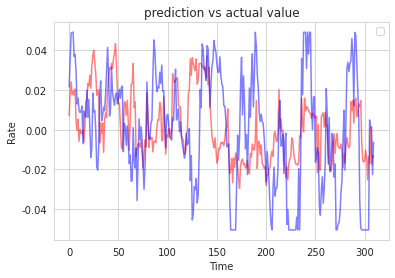

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 다음 주 예측

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  return df

TIGER유로스탁스50_predict = predict_data('2016-03-04', 'TIGER유로스탁스50(H).csv')
TIGER유로스탁스50_combined_predict = merge_data_set(TIGER유로스탁스50_predict, feature_list)
test=TIGER유로스탁스50_combined_predict.iloc[-num:]
test.drop(['Date', 'TIGER유로스탁스50(H)_Close','TIGER유로스탁스50(H)_Volume'],axis=1,inplace=True)

test=scaler.transform(test)
test.shape

(11, 41)

In [ ]:
test=test.reshape(1,num,41)
test=test.mean(axis=1)
pred_TIGER유로스탁스50 = lgbm.predict(test)
pred_TIGER유로스탁스50=pd.DataFrame({"prediction":pred_TIGER유로스탁스50})
pred_TIGER유로스탁스50.index = ['TIGER유로스탁스50']

pred_TIGER유로스탁스50.to_csv('Pred.csv', encoding='utf-8-sig', mode='a', header=False)

### TIGER미국SP500선물

In [ ]:
feature_list = total_feature_list
TIGER미국SP500선물_combined = merge_data_set(TIGER미국SP500선물, feature_list)
TIGER미국SP500선물_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,KOSEF국고채10년_Volume,TIGER원유선물(H)_Volume,TIGER차이나CSI300_Volume,KOSEF미국달러선물인버스_Volume,TIGER코스닥150_Volume,TIGER미국SP500선물(H)_Volume,KOSEF단기자금_Volume,KBSTAR중기우량회사채_Volume,TIGER단기선진하이일드(H)_Volume,KOSEF미국달러선물_Volume
1552,2022-06-27,45705,46100,45675,45920,42587,-0.011868,1830.699951,6.538,110.540001,...,8572714,13102,6523,201992,42587,11849,74,77249,3433,839
1553,2022-06-28,45840,46000,45540,45985,13006,-0.022181,1826.000000,6.765,112.220001,...,6746503,626,3408,149858,13006,59939,32,69705,1422,96
1554,2022-06-29,44885,44960,44805,44885,30109,0.000223,1830.300049,6.833,114.050003,...,6177527,3472,2652,65386,30109,6975,824,37376,1392,2106
1555,2022-06-30,44760,44775,44330,44335,24573,0.002030,1817.300049,6.602,110.449997,...,7940411,323,6501,177411,24573,13436,37,116817,3468,48
1556,2022-07-01,44450,44450,43905,44100,178521,0.009637,1806.099976,5.950,109.339996,...,6240988,1612,4451,296644,178521,28145,53,69527,1205,699


In [ ]:
TIGER미국SP500선물_combined.drop(['Date', 'TIGER미국SP500선물(H)_Close','TIGER미국SP500선물(H)_Volume'], axis=1, inplace=True)

In [ ]:
X = TIGER미국SP500선물_combined.drop('Rate', axis=1)
y = TIGER미국SP500선물_combined[['Rate']]

In [ ]:
X = X.clip(lower=X.quantile(0.05),upper=X.quantile(0.95), axis=1)
y = y.clip(lower=y.quantile(0.05),upper=y.quantile(0.95), axis=1)

In [ ]:
print(f'윈저화된 값: 최소({float(y.min())}), 최대({float(y.max())})')

윈저화된 값: 최소(-0.05252920821403117), 최대(0.0467562039390366)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.86914591e-01, 7.95821952e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.67818986e-01, 1.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.82090123e-01, 2.20678410e-01, 1.00000000e+00],
       ...,
       [7.14466826e-01, 7.13743543e-01, 7.14280679e-01, ...,
        0.00000000e+00, 9.62288868e-02, 6.73454693e-03],
       [7.10064798e-01, 7.07242506e-01, 6.97540001e-01, ...,
        4.89706039e-02, 2.40885780e-01, 2.34789550e-05],
       [6.99147767e-01, 6.95821766e-01, 6.82561500e-01, ...,
        8.61166973e-03, 8.31986175e-02, 2.14636781e-03]])

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

In [ ]:
num = 10
X_scaled = make_windowed_dataset(X_scaled, num)
X_scaled.shape

(1548, 10, 41)

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

(1548, 41)

In [ ]:
y = y.iloc[:-(num-1)].reset_index(drop=True)
y.shape

(1548, 1)

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.02471528114327231
MAE: 0.02067687627713817
R2: -1.6985874190011803


No handles with labels found to put in legend.


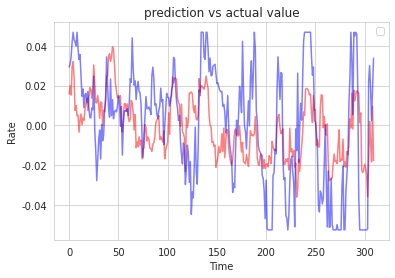

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 다음 주 예측

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  return df

TIGER미국SP500선물_predict = predict_data('2016-03-04', 'TIGER미국SP500선물(H).csv')
TIGER미국SP500선물_combined_predict = merge_data_set(TIGER미국SP500선물_predict, feature_list)
test=TIGER미국SP500선물_combined_predict.iloc[-num:]
test.drop(['Date', 'TIGER미국SP500선물(H)_Close','TIGER미국SP500선물(H)_Volume'],axis=1,inplace=True)

test=scaler.transform(test)
test.shape

(10, 41)

In [ ]:
test=test.reshape(1,num,41)
test=test.mean(axis=1)
pred_TIGER미국SP500선물 = lgbm.predict(test)
pred_TIGER미국SP500선물=pd.DataFrame({"prediction":pred_TIGER미국SP500선물})
pred_TIGER미국SP500선물.index = ['TIGER미국SP500선물']

pred_TIGER미국SP500선물.to_csv('Pred.csv', encoding='utf-8-sig', mode='a', header=False)

### KODEX골드선물


In [ ]:
feature_list = total_feature_list
KODEX골드선물_combined = merge_data_set(KODEX골드선물, feature_list)
KODEX골드선물_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,KOSEF국고채10년_Volume,TIGER원유선물(H)_Volume,TIGER차이나CSI300_Volume,KOSEF미국달러선물인버스_Volume,TIGER코스닥150_Volume,TIGER미국SP500선물(H)_Volume,KOSEF단기자금_Volume,KBSTAR중기우량회사채_Volume,TIGER단기선진하이일드(H)_Volume,KOSEF미국달러선물_Volume
1552,2022-06-27,12290,12335,12270,12330,153877,-0.054745,1830.699951,6.538,110.540001,...,8572714,13102,6523,201992,42587,11849,74,77249,3433,839
1553,2022-06-28,12240,12275,12230,12275,211072,-0.056619,1826.000000,6.765,112.220001,...,6746503,626,3408,149858,13006,59939,32,69705,1422,96
1554,2022-06-29,12200,12240,12200,12220,272401,-0.055237,1830.300049,6.833,114.050003,...,6177527,3472,2652,65386,30109,6975,824,37376,1392,2106
1555,2022-06-30,12215,12220,12170,12185,53241,-0.052524,1817.300049,6.602,110.449997,...,7940411,323,6501,177411,24573,13436,37,116817,3468,48
1556,2022-07-01,12125,12125,12035,12060,134421,-0.053483,1806.099976,5.950,109.339996,...,6240988,1612,4451,296644,178521,28145,53,69527,1205,699


In [ ]:
KODEX골드선물_combined.drop(['Date', 'KODEX골드선물(H)_Close','KODEX골드선물(H)_Volume'], axis=1, inplace=True)

In [ ]:
X = KODEX골드선물_combined.drop('Rate', axis=1)
y = KODEX골드선물_combined[['Rate']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.70509482, -0.70288683, -0.7022335 , ...,  0.05863741,
         0.0647791 , -0.29020813],
       [-0.68431578, -0.67875381, -0.69527919, ...,  0.00509001,
         1.70801263,  3.15615636],
       [-0.67392626, -0.66151593, -0.66050764, ...,  0.04510877,
        -0.06706935,  3.47224367],
       ...,
       [ 1.0091756 ,  1.010558  ,  1.03634413, ..., -1.07913289,
        -0.0955987 , -0.26697085],
       [ 1.01956512,  0.9967677 ,  1.0154812 , ..., -0.8890163 ,
        -0.06243692, -0.28995131],
       [ 0.95722801,  0.93126377,  0.92159801, ..., -1.00218977,
        -0.09858582, -0.28268198]])

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

In [ ]:
num = 6
X_scaled = make_windowed_dataset(X_scaled, num)
X_scaled.shape

(1552, 6, 41)

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

(1552, 41)

In [ ]:
y = y.iloc[:-(num-1)].reset_index(drop=True)
y.shape

(1552, 1)

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.028031007334168783
MAE: 0.021752944705780142
R2: -3.508495175137864


No handles with labels found to put in legend.


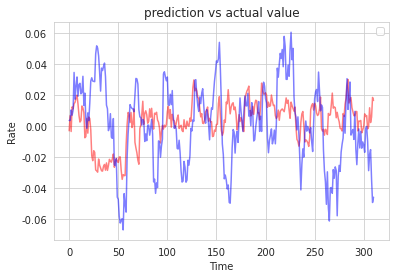

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 다음 주 예측

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  return df

KODEX골드선물_predict = predict_data('2016-03-04', 'KODEX골드선물(H).csv')
KODEX골드선물_combined_predict = merge_data_set(KODEX골드선물_predict, feature_list)
test=KODEX골드선물_combined_predict.iloc[-num:]
test.drop(['Date', 'KODEX골드선물(H)_Close','KODEX골드선물(H)_Volume'],axis=1,inplace=True)

test=scaler.transform(test)
test.shape

(6, 41)

In [ ]:
test=test.reshape(1,num,41)
test=test.mean(axis=1)
pred_KODEX골드선물 = lgbm.predict(test)
pred_KODEX골드선물=pd.DataFrame({"prediction":pred_KODEX골드선물})
pred_KODEX골드선물.index = ['KODEX골드선물']

pred_KODEX골드선물.to_csv('Pred.csv', encoding='utf-8-sig', mode='a', header=False)

### TIGER원유선물

In [ ]:
feature_list = total_feature_list
TIGER원유선물_combined = merge_data_set(TIGER원유선물, feature_list)
TIGER원유선물_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,KOSEF국고채10년_Volume,TIGER원유선물(H)_Volume,TIGER차이나CSI300_Volume,KOSEF미국달러선물인버스_Volume,TIGER코스닥150_Volume,TIGER미국SP500선물(H)_Volume,KOSEF단기자금_Volume,KBSTAR중기우량회사채_Volume,TIGER단기선진하이일드(H)_Volume,KOSEF미국달러선물_Volume
1552,2022-06-27,5500,5595,5460,5555,201992,-0.044104,1830.699951,6.538,110.540001,...,8572714,13102,6523,201992,42587,11849,74,77249,3433,839
1553,2022-06-28,5680,5740,5675,5740,149858,-0.083624,1826.000000,6.765,112.220001,...,6746503,626,3408,149858,13006,59939,32,69705,1422,96
1554,2022-06-29,5775,5810,5720,5765,65386,-0.136167,1830.300049,6.833,114.050003,...,6177527,3472,2652,65386,30109,6975,824,37376,1392,2106
1555,2022-06-30,5680,5710,5645,5675,177411,-0.118062,1817.300049,6.602,110.449997,...,7940411,323,6501,177411,24573,13436,37,116817,3468,48
1556,2022-07-01,5500,5525,5410,5445,296644,-0.084481,1806.099976,5.950,109.339996,...,6240988,1612,4451,296644,178521,28145,53,69527,1205,699


In [ ]:
TIGER원유선물_combined.drop(['Date', 'TIGER원유선물(H)_Close','TIGER원유선물(H)_Volume'], axis=1, inplace=True)

In [ ]:
X = TIGER원유선물_combined.drop('Rate', axis=1)
y = TIGER원유선물_combined[['Rate']]

In [ ]:
X = X.clip(lower=X.quantile(0.05),upper=X.quantile(0.95), axis=1)
y = y.clip(lower=y.quantile(0.05),upper=y.quantile(0.95), axis=1)

In [ ]:
print(f'윈저화된 값: 최소({float(y.min())}), 최대({float(y.max())})')

윈저화된 값: 최소(-0.10406691575564668), 최대(0.10045907567308147)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[4.87444609e-01, 4.88269795e-01, 4.91097923e-01, ...,
        3.86914591e-01, 7.95821952e-01, 0.00000000e+00],
       [5.28803545e-01, 5.38123167e-01, 5.32640950e-01, ...,
        3.67818986e-01, 1.00000000e+00, 1.00000000e+00],
       [5.71639586e-01, 5.67448680e-01, 5.54896142e-01, ...,
        3.82090123e-01, 2.20678410e-01, 1.00000000e+00],
       ...,
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 9.62288868e-02, 6.73454693e-03],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        4.89706039e-02, 2.40885780e-01, 2.34789550e-05],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        8.61166973e-03, 8.31986175e-02, 2.14636781e-03]])

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

In [ ]:
num = 8
X_scaled = make_windowed_dataset(X_scaled, num)
X_scaled.shape

(1550, 8, 41)

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

(1550, 41)

In [ ]:
y = y.iloc[:-(num-1)].reset_index(drop=True)
y.shape

(1550, 1)

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.08713873236498385
MAE: 0.074863608593803
R2: -15.288967813599037


No handles with labels found to put in legend.


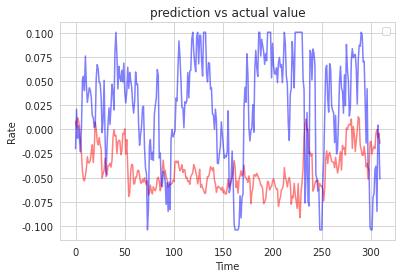

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 다음 주 예측

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  return df

TIGER원유선물_predict = predict_data('2016-03-04', 'TIGER원유선물(H).csv')
TIGER원유선물_combined_predict = merge_data_set(TIGER원유선물_predict, feature_list)
test=TIGER원유선물_combined_predict.iloc[-num:]
test.drop(['Date', 'TIGER원유선물(H)_Close','TIGER원유선물(H)_Volume'],axis=1,inplace=True)

test=scaler.transform(test)
test.shape

(8, 41)

In [ ]:
test=test.reshape(1,num,41)
test=test.mean(axis=1)
pred_TIGER원유선물 = lgbm.predict(test)
pred_TIGER원유선물=pd.DataFrame({"prediction":pred_TIGER원유선물})
pred_TIGER원유선물.index = ['TIGER원유선물']

pred_TIGER원유선물.to_csv('Pred.csv', encoding='utf-8-sig', mode='a', header=False)

### KOSEF미국달러선물


In [ ]:
feature_list = total_feature_list
KOSEF미국달러선물_combined = merge_data_set(KOSEF미국달러선물, feature_list)
KOSEF미국달러선물_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,KOSEF국고채10년_Volume,TIGER원유선물(H)_Volume,TIGER차이나CSI300_Volume,KOSEF미국달러선물인버스_Volume,TIGER코스닥150_Volume,TIGER미국SP500선물(H)_Volume,KOSEF단기자금_Volume,KBSTAR중기우량회사채_Volume,TIGER단기선진하이일드(H)_Volume,KOSEF미국달러선물_Volume
1552,2022-06-27,13555,13575,13425,13495,6523,0.014079,1830.699951,6.538,110.540001,...,8572714,13102,6523,201992,42587,11849,74,77249,3433,839
1553,2022-06-28,13485,13500,13455,13455,3408,0.024155,1826.000000,6.765,112.220001,...,6746503,626,3408,149858,13006,59939,32,69705,1422,96
1554,2022-06-29,13540,13635,13525,13635,2652,0.004767,1830.300049,6.833,114.050003,...,6177527,3472,2652,65386,30109,6975,824,37376,1392,2106
1555,2022-06-30,13640,13675,13615,13630,6501,0.010271,1817.300049,6.602,110.449997,...,7940411,323,6501,177411,24573,13436,37,116817,3468,48
1556,2022-07-01,13540,13630,13530,13615,4451,0.022402,1806.099976,5.950,109.339996,...,6240988,1612,4451,296644,178521,28145,53,69527,1205,699


In [ ]:
KOSEF미국달러선물_combined.drop(['Date', 'KOSEF미국달러선물_Close','KOSEF미국달러선물_Volume'], axis=1, inplace=True)

In [ ]:
X = KOSEF미국달러선물_combined.drop('Rate', axis=1)
y = KOSEF미국달러선물_combined[['Rate']]

In [ ]:
X = X.clip(lower=X.quantile(0.05),upper=X.quantile(0.95), axis=1)
y = y.clip(lower=y.quantile(0.05),upper=y.quantile(0.95), axis=1)

In [ ]:
print(f'윈저화된 값: 최소({float(y.min())}), 최대({float(y.max())})')

윈저화된 값: 최소(-0.02266268779872891), 최대(0.026469625904993372)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.34565297,  0.37902762,  0.29657811, ..., -0.51153762,
         0.16575953,  2.31113928],
       [ 0.12445198,  0.19111107,  0.18146636, ..., -0.49380045,
         0.09447934,  3.07073488],
       [ 0.17379681,  0.2486711 ,  0.17300227, ..., -0.51153762,
         0.14775073,  0.17145529],
       ...,
       [ 1.83212362,  1.85188709,  1.82417866, ..., -0.27445077,
        -1.27851768, -0.2915294 ],
       [ 1.83212362,  1.85188709,  1.82417866, ..., -0.50710332,
        -1.0957199 ,  0.24663197],
       [ 1.83212362,  1.85188709,  1.82417866, ..., -0.50237341,
        -1.24637198, -0.3400054 ]])

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

In [ ]:
num = 8
X_scaled = make_windowed_dataset(X_scaled, num)
X_scaled.shape

(1550, 8, 41)

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

(1550, 41)

In [ ]:
y = y.iloc[:-(num-1)].reset_index(drop=True)
y.shape

(1550, 1)

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.009270127274564608
MAE: 0.007406261480507485
R2: -0.039117790769650274


No handles with labels found to put in legend.


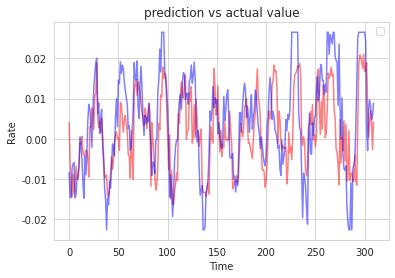

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 다음 주 예측

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  return df

KOSEF미국달러선물_predict = predict_data('2016-03-04', 'KOSEF미국달러선물.csv')
KOSEF미국달러선물_combined_predict = merge_data_set(KOSEF미국달러선물_predict, feature_list)
test=KOSEF미국달러선물_combined_predict.iloc[-num:]
test.drop(['Date', 'KOSEF미국달러선물_Close','KOSEF미국달러선물_Volume'],axis=1,inplace=True)

test=scaler.transform(test)
test.shape

(8, 41)

In [ ]:
test=test.reshape(1,num,41)
test=test.mean(axis=1)
pred_KOSEF미국달러선물 = lgbm.predict(test)
pred_KOSEF미국달러선물=pd.DataFrame({"prediction":pred_KOSEF미국달러선물})
pred_KOSEF미국달러선물.index = ['KOSEF미국달러선물']

pred_KOSEF미국달러선물.to_csv('Pred.csv', encoding='utf-8-sig', mode='a', header=False)

### KOSEF미국달러선물인버스


In [ ]:
feature_list = total_feature_list
KOSEF미국달러선물인버스_combined = merge_data_set(KOSEF미국달러선물인버스, feature_list)
KOSEF미국달러선물인버스_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,KOSEF국고채10년_Volume,TIGER원유선물(H)_Volume,TIGER차이나CSI300_Volume,KOSEF미국달러선물인버스_Volume,TIGER코스닥150_Volume,TIGER미국SP500선물(H)_Volume,KOSEF단기자금_Volume,KBSTAR중기우량회사채_Volume,TIGER단기선진하이일드(H)_Volume,KOSEF미국달러선물_Volume
1552,2022-06-27,9230,9300,9220,9280,3433,-0.014009,1830.699951,6.538,110.540001,...,8572714,13102,6523,201992,42587,11849,74,77249,3433,839
1553,2022-06-28,9280,9300,9265,9300,1422,-0.022581,1826.000000,6.765,112.220001,...,6746503,626,3408,149858,13006,59939,32,69705,1422,96
1554,2022-06-29,9240,9245,9185,9185,1392,-0.006532,1830.300049,6.833,114.050003,...,6177527,3472,2652,65386,30109,6975,824,37376,1392,2106
1555,2022-06-30,9180,9185,9145,9185,3468,-0.010343,1817.300049,6.602,110.449997,...,7940411,323,6501,177411,24573,13436,37,116817,3468,48
1556,2022-07-01,9250,9250,9180,9190,1205,-0.021763,1806.099976,5.950,109.339996,...,6240988,1612,4451,296644,178521,28145,53,69527,1205,699


In [ ]:
KOSEF미국달러선물인버스_combined.drop(['Date', 'KOSEF미국달러선물인버스_Close','KOSEF미국달러선물인버스_Volume'], axis=1, inplace=True)

In [ ]:
X = KOSEF미국달러선물인버스_combined.drop('Rate', axis=1)
y = KOSEF미국달러선물인버스_combined[['Rate']]

In [ ]:
X = X.clip(lower=X.quantile(0.05),upper=X.quantile(0.95), axis=1)
y = y.clip(lower=y.quantile(0.05),upper=y.quantile(0.95), axis=1)

In [ ]:
print(f'윈저화된 값: 최소({float(y.min())}), 최대({float(y.max())})')

윈저화된 값: 최소(-0.026209809010241104), 최대(0.02249971391424593)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.69053212, -0.54570921, -0.64597351, ...,  0.16575953,
         2.31113928, -0.30419138],
       [-0.45264853, -0.45675931, -0.4651626 , ...,  0.09447934,
         3.07073488,  3.76460545],
       [-0.46256034, -0.50617592, -0.53547796, ...,  0.14775073,
         0.17145529,  3.76460545],
       ...,
       [-1.75307883, -1.75147456, -1.77101914, ..., -1.27851768,
        -0.2915294 , -0.27678987],
       [-1.75307883, -1.75147456, -1.77101914, ..., -1.0957199 ,
         0.24663197, -0.30409585],
       [-1.75307883, -1.75147456, -1.77101914, ..., -1.24637198,
        -0.3400054 , -0.29545824]])

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

In [ ]:
num = 8
X_scaled = make_windowed_dataset(X_scaled, num)
X_scaled.shape

(1550, 8, 41)

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

(1550, 41)

In [ ]:
y = y.iloc[:-(num-1)].reset_index(drop=True)
y.shape

(1550, 1)

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.008935096961754976
MAE: 0.007101304599080083
R2: 0.10249195894305307


No handles with labels found to put in legend.


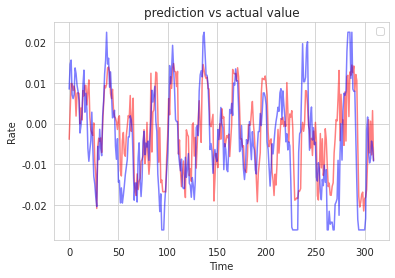

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 다음 주 예측

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  return df

KOSEF미국달러선물인버스_predict = predict_data('2016-03-04', 'KOSEF미국달러선물인버스.csv')
KOSEF미국달러선물인버스_combined_predict = merge_data_set(KOSEF미국달러선물인버스_predict, feature_list)
test=KOSEF미국달러선물인버스_combined_predict.iloc[-num:]
test.drop(['Date', 'KOSEF미국달러선물인버스_Close','KOSEF미국달러선물인버스_Volume'],axis=1,inplace=True)

test=scaler.transform(test)
test.shape

(8, 41)

In [ ]:
test=test.reshape(1,num,41)
test=test.mean(axis=1)
pred_KOSEF미국달러선물인버스 = lgbm.predict(test)
pred_KOSEF미국달러선물인버스=pd.DataFrame({"prediction":pred_KOSEF미국달러선물인버스})
pred_KOSEF미국달러선물인버스.index = ['KOSEF미국달러선물인버스']

pred_KOSEF미국달러선물인버스.to_csv('Pred.csv', encoding='utf-8-sig', mode='a', header=False)

### KOSEF국고채10년


In [ ]:
feature_list = total_feature_list
KOSEF국고채10년_combined = merge_data_set(KOSEF국고채10년, feature_list)
KOSEF국고채10년_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,KOSEF국고채10년_Volume,TIGER원유선물(H)_Volume,TIGER차이나CSI300_Volume,KOSEF미국달러선물인버스_Volume,TIGER코스닥150_Volume,TIGER미국SP500선물(H)_Volume,KOSEF단기자금_Volume,KBSTAR중기우량회사채_Volume,TIGER단기선진하이일드(H)_Volume,KOSEF미국달러선물_Volume
1552,2022-06-27,107785,108000,107340,107495,11849,0.028420,1830.699951,6.538,110.540001,...,8572714,13102,6523,201992,42587,11849,74,77249,3433,839
1553,2022-06-28,108000,108000,107165,108000,59939,0.024907,1826.000000,6.765,112.220001,...,6746503,626,3408,149858,13006,59939,32,69705,1422,96
1554,2022-06-29,107970,108000,107540,107930,6975,0.031687,1830.300049,6.833,114.050003,...,6177527,3472,2652,65386,30109,6975,824,37376,1392,2106
1555,2022-06-30,107930,108280,107780,108030,13436,0.029436,1817.300049,6.602,110.449997,...,7940411,323,6501,177411,24573,13436,37,116817,3468,48
1556,2022-07-01,108105,109610,108105,109485,28145,0.020003,1806.099976,5.950,109.339996,...,6240988,1612,4451,296644,178521,28145,53,69527,1205,699


In [ ]:
KOSEF국고채10년_combined.drop(['Date', 'KOSEF국고채10년_Close','KOSEF국고채10년_Volume'], axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(KOSEF국고채10년_combined, test_size=0.2, shuffle=False)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler_1 = MinMaxScaler()
scaler_target = MinMaxScaler()

train[train.columns.drop('Rate')] = scaler_1.fit_transform(train[train.columns.drop('Rate')])
test[train.columns.drop('Rate')] = scaler_1.transform(test[train.columns.drop('Rate')])

train[['Rate']] = scaler_target.fit_transform(train[['Rate']])
test[['Rate']] = scaler_target.transform(test[['Rate']])

In [ ]:
# Creating a data structure with n timesteps and 1 output
time_step = 8
y = train.Rate
train.drop('Rate', axis=1, inplace=True)
X_train = []
y_train = []
for i in range(time_step,len(train)):
  X_train.append(train.iloc[i-time_step:i,])
  y_train.append(y.iloc[i-time_step])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 41))
X_train.shape

(1237, 8, 41)

#### Using pretrained model

In [ ]:
# Importing the Keras libraries and packages
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, BatchNormalization
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [ ]:
regressor = tf.keras.models.load_model('국고채model.h5')

In [ ]:
# preprocessing the test dataset
# Creating a data structure with n timesteps
# 이전에 지정해주었던 test를 y_test로 사용하기로 한다.(Scaling은 되어 있음)
y_test = np.reshape(np.array(test.iloc[:,5]), (-1,1))
test.drop('Rate', axis=1, inplace=True)
total_data = np.concatenate([train, test], axis=0)

X_test = []
for i in range(len(total_data)-len(test), len(total_data)):
  X_test.append(total_data[i-time_step:i,:])
X_test = np.array(X_test)

# Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 41))
X_test.shape

print(f"shape of X_test: {X_test.shape}")
print(f"shape of y_test: {y_test.shape}")

shape of X_test: (312, 8, 41)
shape of y_test: (312, 1)


In [ ]:
real = y_test
pred= regressor.predict(X_test)
real = scaler_target.inverse_transform(real)
pred = scaler_target.inverse_transform(pred)

print(f'RMSE: {np.sqrt(mean_squared_error(pred,real))}')
print(f'MAE: {mean_absolute_error(pred,real)}')
print(f'R2: {r2_score(pred, real)}')

RMSE: 0.019492685458013775
MAE: 0.01436515389856485
R2: -1.610559785963547


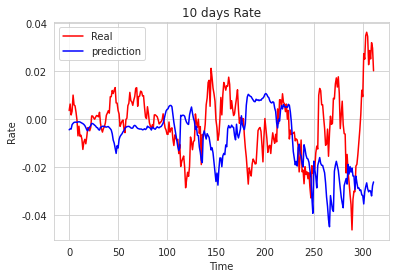

In [ ]:
# Visualising the results
plt.plot(real, color = 'red', label = 'Real')
plt.plot(pred, color = 'blue', label = 'prediction')
plt.title('10 days Rate')
plt.xlabel('Time')
plt.ylabel("Rate")
plt.legend(loc='best')
plt.show()

#### 다음 주 예측

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  return df

KOSEF국고채10년_predict = predict_data('2016-03-04', 'KOSEF국고채10년.csv')
KOSEF국고채10년_combined_predict = merge_data_set(KOSEF국고채10년_predict, feature_list)
test=KOSEF국고채10년_combined_predict.iloc[-time_step:]
test.drop(['Date', 'KOSEF국고채10년_Close','KOSEF국고채10년_Volume'],axis=1,inplace=True)

test=scaler_1.transform(test)
test.shape

(8, 41)

In [ ]:
test=test.reshape(1,time_step,41)
pred_KOSEF국고채10년 = regressor.predict(test)
pred_KOSEF국고채10년 = scaler_target.inverse_transform(pred_KOSEF국고채10년)[0]
pred_KOSEF국고채10년=pd.DataFrame({"prediction":pred_KOSEF국고채10년})
pred_KOSEF국고채10년.index = ['KOSEF국고채10년']

pred_KOSEF국고채10년.to_csv('Pred.csv', encoding='utf-8-sig', mode='a', header=False)

### KBSTAR중기우량회사채

In [ ]:
feature_list = total_feature_list
KBSTAR중기우량회사채_combined = merge_data_set(KBSTAR중기우량회사채, feature_list)
KBSTAR중기우량회사채_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,KOSEF국고채10년_Volume,TIGER원유선물(H)_Volume,TIGER차이나CSI300_Volume,KOSEF미국달러선물인버스_Volume,TIGER코스닥150_Volume,TIGER미국SP500선물(H)_Volume,KOSEF단기자금_Volume,KBSTAR중기우량회사채_Volume,TIGER단기선진하이일드(H)_Volume,KOSEF미국달러선물_Volume
1552,2022-06-27,101255,101285,101225,101225,74,0.005680,1830.699951,6.538,110.540001,...,8572714,13102,6523,201992,42587,11849,74,77249,3433,839
1553,2022-06-28,101225,101345,101215,101315,32,0.005281,1826.000000,6.765,112.220001,...,6746503,626,3408,149858,13006,59939,32,69705,1422,96
1554,2022-06-29,101210,101240,101145,101240,824,0.007655,1830.300049,6.833,114.050003,...,6177527,3472,2652,65386,30109,6975,824,37376,1392,2106
1555,2022-06-30,101350,101350,101265,101320,37,0.005083,1817.300049,6.602,110.449997,...,7940411,323,6501,177411,24573,13436,37,116817,3468,48
1556,2022-07-01,101305,101525,101225,101525,53,0.003743,1806.099976,5.950,109.339996,...,6240988,1612,4451,296644,178521,28145,53,69527,1205,699


In [ ]:
KBSTAR중기우량회사채_combined.drop(['Date', 'KBSTAR중기우량회사채_Close','KBSTAR중기우량회사채_Volume'], axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(KBSTAR중기우량회사채_combined, test_size=0.2, shuffle=False)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler_1 = MinMaxScaler()
scaler_target = MinMaxScaler()

train[train.columns.drop('Rate')] = scaler_1.fit_transform(train[train.columns.drop('Rate')])
test[train.columns.drop('Rate')] = scaler_1.transform(test[train.columns.drop('Rate')])

train[['Rate']] = scaler_target.fit_transform(train[['Rate']])
test[['Rate']] = scaler_target.transform(test[['Rate']])

In [ ]:
# Creating a data structure with n timesteps and 1 output
time_step = 30
y = train.Rate
train.drop('Rate', axis=1, inplace=True)
X_train = []
y_train = []
for i in range(time_step,len(train)):
  X_train.append(train.iloc[i-time_step:i,])
  y_train.append(y.iloc[i-time_step])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 41))
X_train.shape

(1215, 30, 41)

#### Using pretrained model

In [ ]:
regressor = tf.keras.models.load_model('중기우량회사채.h5')

In [ ]:
# preprocessing the test dataset
# Creating a data structure with n timesteps
# 이전에 지정해주었던 test를 y_test로 사용하기로 한다.(Scaling은 되어 있음)
y_test = np.reshape(np.array(test.iloc[:,5]), (-1,1))
test.drop('Rate', axis=1, inplace=True)
total_data = np.concatenate([train, test], axis=0)

X_test = []
for i in range(len(total_data)-len(test), len(total_data)):
  X_test.append(total_data[i-time_step:i,:])
X_test = np.array(X_test)

# Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 41))
X_test.shape

print(f"shape of X_test: {X_test.shape}")
print(f"shape of y_test: {y_test.shape}")

shape of X_test: (312, 30, 41)
shape of y_test: (312, 1)


In [ ]:
real = y_test
pred= regressor.predict(X_test)
real = scaler_target.inverse_transform(real)
pred = scaler_target.inverse_transform(pred)

print(f'RMSE: {np.sqrt(mean_squared_error(pred,real))}')
print(f'MAE: {mean_absolute_error(pred,real)}')
print(f'R2: {r2_score(pred, real)}')

RMSE: 0.005502128459865757
MAE: 0.004298900622804198
R2: -7.759226747014603


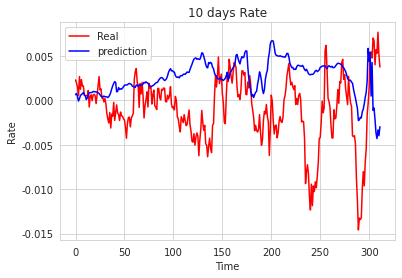

In [ ]:
# Visualising the results
plt.plot(real, color = 'red', label = 'Real')
plt.plot(pred, color = 'blue', label = 'prediction')
plt.title('10 days Rate')
plt.xlabel('Time')
plt.ylabel("Rate")
plt.legend(loc='best')
plt.show()

#### 다음 주 예측

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  return df

KBSTAR중기우량회사채_predict = predict_data('2016-03-04', 'KBSTAR중기우량회사채.csv')
KBSTAR중기우량회사채_combined_predict = merge_data_set(KBSTAR중기우량회사채_predict, feature_list)
test=KBSTAR중기우량회사채_combined_predict.iloc[-time_step:,:]
test.drop(['Date', 'KOSEF국고채10년_Close','KOSEF국고채10년_Volume'],axis=1,inplace=True)

test=scaler_1.transform(test)
test.shape

(30, 41)

In [ ]:
test=test.reshape(1,time_step,41)
pred_KBSTAR중기우량회사채 = regressor.predict(test)
pred_KBSTAR중기우량회사채 = scaler_target.inverse_transform(pred_KBSTAR중기우량회사채)[0]
pred_KBSTAR중기우량회사채=pd.DataFrame({"prediction":pred_KBSTAR중기우량회사채})
pred_KBSTAR중기우량회사채.index = ['KBSTAR중기우량회사채']

pred_KBSTAR중기우량회사채.to_csv('Pred.csv', encoding='utf-8-sig', mode='a', header=False)

### TIGER단기선진하이일드


In [ ]:
feature_list = total_feature_list
TIGER단기선진하이일드_combined = merge_data_set(TIGER단기선진하이일드, feature_list)
TIGER단기선진하이일드_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,KOSEF국고채10년_Volume,TIGER원유선물(H)_Volume,TIGER차이나CSI300_Volume,KOSEF미국달러선물인버스_Volume,TIGER코스닥150_Volume,TIGER미국SP500선물(H)_Volume,KOSEF단기자금_Volume,KBSTAR중기우량회사채_Volume,TIGER단기선진하이일드(H)_Volume,KOSEF미국달러선물_Volume
1552,2022-06-27,11565,11625,11565,11565,1769,0.002162,1830.699951,6.538,110.540001,...,8572714,13102,6523,201992,42587,11849,74,77249,3433,839
1553,2022-06-28,11630,11630,11580,11580,36,0.000432,1826.000000,6.765,112.220001,...,6746503,626,3408,149858,13006,59939,32,69705,1422,96
1554,2022-06-29,11540,11540,11500,11540,32,0.001300,1830.300049,6.833,114.050003,...,6177527,3472,2652,65386,30109,6975,824,37376,1392,2106
1555,2022-06-30,11465,11465,11395,11460,2668,0.005672,1817.300049,6.602,110.449997,...,7940411,323,6501,177411,24573,13436,37,116817,3468,48
1556,2022-07-01,11435,11435,11370,11430,969,0.000437,1806.099976,5.950,109.339996,...,6240988,1612,4451,296644,178521,28145,53,69527,1205,699


In [ ]:
TIGER단기선진하이일드_combined.drop(['Date', 'TIGER단기선진하이일드(H)_Close','TIGER단기선진하이일드(H)_Volume'], axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(KOSEF국고채10년_combined, test_size=0.2, shuffle=False)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler_1 = MinMaxScaler()
scaler_target = MinMaxScaler()

train[train.columns.drop('Rate')] = scaler_1.fit_transform(train[train.columns.drop('Rate')])
test[train.columns.drop('Rate')] = scaler_1.transform(test[train.columns.drop('Rate')])

train[['Rate']] = scaler_target.fit_transform(train[['Rate']])
test[['Rate']] = scaler_target.transform(test[['Rate']])

In [ ]:
# Creating a data structure with n timesteps and 1 output
time_step = 15
y = train.Rate
train.drop('Rate', axis=1, inplace=True)
X_train = []
y_train = []
for i in range(time_step,len(train)):
  X_train.append(train.iloc[i-time_step:i,:])
  y_train.append(y.iloc[i-time_step])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 41))
X_train.shape

(1230, 15, 41)

#### Using pretrained model

In [ ]:
regressor = tf.keras.models.load_model('단기선진하이일드.h5')

In [ ]:
# preprocessing the test dataset
# Creating a data structure with n timesteps
# 이전에 지정해주었던 test를 y_test로 사용하기로 한다.(Scaling은 되어 있음)
y_test = np.reshape(np.array(test.iloc[:,5]), (-1,1))
test.drop('Rate', axis=1, inplace=True)
total_data = np.concatenate([train, test], axis=0)

X_test = []
for i in range(len(total_data)-len(test), len(total_data)):
  X_test.append(total_data[i-time_step:i,:])
X_test = np.array(X_test)

# Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 41))
X_test.shape

print(f"shape of X_test: {X_test.shape}")
print(f"shape of y_test: {y_test.shape}")

shape of X_test: (312, 15, 41)
shape of y_test: (312, 1)


In [ ]:
real = y_test
pred= regressor.predict(X_test)
real = scaler_target.inverse_transform(real)
pred = scaler_target.inverse_transform(pred)

print(f'RMSE: {np.sqrt(mean_squared_error(pred,real))}')
print(f'MAE: {mean_absolute_error(pred,real)}')
print(f'R2: {r2_score(pred, real)}')

RMSE: 0.013511936675188466
MAE: 0.010476370786542642
R2: -9.464987445839247


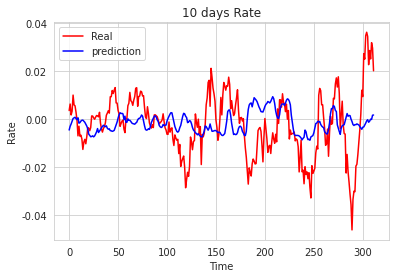

In [ ]:
# Visualising the results
plt.plot(real, color = 'red', label = 'Real')
plt.plot(pred, color = 'blue', label = 'prediction')
plt.title('10 days Rate')
plt.xlabel('Time')
plt.ylabel("Rate")
plt.legend(loc='best')
plt.show()

#### 다음 주 예측

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  return df

TIGER단기선진하이일드_predict = predict_data('2016-03-04', 'TIGER단기선진하이일드(H).csv')
TIGER단기선진하이일드_combined_predict = merge_data_set(TIGER단기선진하이일드_predict, feature_list)
test= TIGER단기선진하이일드_combined_predict.iloc[-time_step:]
test.drop(['Date', 'TIGER단기선진하이일드(H)_Close','TIGER단기선진하이일드(H)_Volume'],axis=1,inplace=True)

test=scaler_1.transform(test)
test.shape

(15, 41)

In [ ]:
test=test.reshape(1,time_step,41)
pred_TIGER단기선진하이일드 = regressor.predict(test)
pred_TIGER단기선진하이일드 = scaler_target.inverse_transform(pred_TIGER단기선진하이일드)[0]
pred_TIGER단기선진하이일드=pd.DataFrame({"prediction":pred_TIGER단기선진하이일드})
pred_TIGER단기선진하이일드.index = ['TIGER단기선진하이일드']

pred_TIGER단기선진하이일드.to_csv('Pred.csv', encoding='utf-8-sig', mode='a', header=False)

### KOSEF단기자금


In [ ]:
feature_list = total_feature_list
KOSEF단기자금_combined = merge_data_set(KOSEF단기자금, feature_list)
KOSEF단기자금_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,KOSEF국고채10년_Volume,TIGER원유선물(H)_Volume,TIGER차이나CSI300_Volume,KOSEF미국달러선물인버스_Volume,TIGER코스닥150_Volume,TIGER미국SP500선물(H)_Volume,KOSEF단기자금_Volume,KBSTAR중기우량회사채_Volume,TIGER단기선진하이일드(H)_Volume,KOSEF미국달러선물_Volume
1552,2022-06-27,101330,101340,101330,101330,13102,-0.000296,1830.699951,6.538,110.540001,...,8572714,13102,6523,201992,42587,11849,74,77249,3433,839
1553,2022-06-28,101340,101340,101330,101330,626,-0.000345,1826.000000,6.765,112.220001,...,6746503,626,3408,149858,13006,59939,32,69705,1422,96
1554,2022-06-29,101330,101335,101325,101330,3472,-0.000987,1830.300049,6.833,114.050003,...,6177527,3472,2652,65386,30109,6975,824,37376,1392,2106
1555,2022-06-30,101305,101335,101305,101330,323,-0.000197,1817.300049,6.602,110.449997,...,7940411,323,6501,177411,24573,13436,37,116817,3468,48
1556,2022-07-01,101320,101325,101310,101310,1612,-0.000099,1806.099976,5.950,109.339996,...,6240988,1612,4451,296644,178521,28145,53,69527,1205,699


In [ ]:
KOSEF단기자금_combined.drop(['Date', 'KOSEF단기자금_Close','KOSEF단기자금_Volume'], axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(KOSEF국고채10년_combined, test_size=0.2, shuffle=False)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler_1 = MinMaxScaler()
scaler_target = MinMaxScaler()

train[train.columns.drop('Rate')] = scaler_1.fit_transform(train[train.columns.drop('Rate')])
test[train.columns.drop('Rate')] = scaler_1.transform(test[train.columns.drop('Rate')])

train[['Rate']] = scaler_target.fit_transform(train[['Rate']])
test[['Rate']] = scaler_target.transform(test[['Rate']])

In [ ]:
# Creating a data structure with n timesteps and 1 output
time_step = 30
y = train.Rate
train.drop('Rate', axis=1, inplace=True)
X_train = []
y_train = []
for i in range(time_step,len(train)):
  X_train.append(train.iloc[i-time_step:i,])
  y_train.append(y.iloc[i-time_step])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 41))
X_train.shape

(1215, 30, 41)

#### Using pretrained model

In [ ]:
regressor = tf.keras.models.load_model('단기자금model.h5')

In [ ]:
# preprocessing the test dataset
# Creating a data structure with n timesteps
# 이전에 지정해주었던 test를 y_test로 사용하기로 한다.(Scaling은 되어 있음)
y_test = np.reshape(np.array(test.iloc[:,5]), (-1,1))
test.drop('Rate', axis=1, inplace=True)
total_data = np.concatenate([train, test], axis=0)

X_test = []
for i in range(len(total_data)-len(test), len(total_data)):
  X_test.append(total_data[i-time_step:i,:])
X_test = np.array(X_test)

# Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 41))
X_test.shape

print(f"shape of X_test: {X_test.shape}")
print(f"shape of y_test: {y_test.shape}")

shape of X_test: (312, 30, 41)
shape of y_test: (312, 1)


In [ ]:
real = y_test
pred= regressor.predict(X_test)
real = scaler_target.inverse_transform(real)
pred = scaler_target.inverse_transform(pred)

print(f'RMSE: {np.sqrt(mean_squared_error(pred,real))}')
print(f'MAE: {mean_absolute_error(pred,real)}')
print(f'R2: {r2_score(pred, real)}')

RMSE: 0.01709694351210635
MAE: 0.01240023009585158
R2: -6.18096622290049


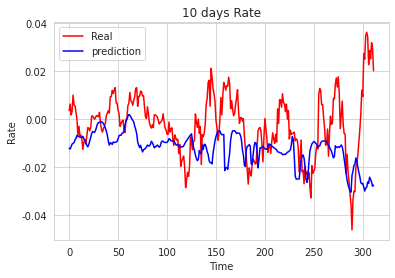

In [ ]:
# Visualising the results
plt.plot(real, color = 'red', label = 'Real')
plt.plot(pred, color = 'blue', label = 'prediction')
plt.title('10 days Rate')
plt.xlabel('Time')
plt.ylabel("Rate")
plt.legend(loc='best')
plt.show()

#### 다음 주 예측

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  return df

KOSEF단기자금_predict = predict_data('2016-03-04', 'KOSEF단기자금.csv')
KOSEF단기자금_combined_predict = merge_data_set(KOSEF단기자금_predict, feature_list)
test=KOSEF단기자금_combined_predict.iloc[-time_step:,:]
test.drop(['Date', 'KOSEF단기자금_Close','KOSEF단기자금_Volume'],axis=1,inplace=True)

test=scaler_1.transform(test)
test.shape

(30, 41)

In [ ]:
test=test.reshape(1,time_step,41)
pred_KOSEF단기자금 = regressor.predict(test)
pred_KOSEF단기자금 = scaler_target.inverse_transform(pred_KOSEF단기자금)[0]
pred_KOSEF단기자금=pd.DataFrame({"prediction":pred_KOSEF단기자금})
pred_KOSEF단기자금.index = ['KOSEF단기자금']

pred_KOSEF단기자금.to_csv('Pred.csv', encoding='utf-8-sig', mode='a', header=False)